In [1]:
# Moving Average Crossing Strategy
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from functools import reduce
import datetime
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [5]:
# Importing the Data
my_ohlc_data = pd.read_excel(r"C:\Users\Yousef Shahin\Downloads\bb_crude_data.xlsx")# Converting to Array
my_ohlc_data.head(20)
# my_ohlc_data = np.array(my_ohlc_data)

,Dates,Close,Open,High,Low
0,2010-04-13,84.05,84.36,84.42,82.51
1,2010-04-14,85.84,83.82,86.39,83.71
2,2010-04-15,85.51,85.91,86.27,85.27
3,2010-04-16,83.24,85.31,85.44,82.52
4,2010-04-19,81.45,82.90,83.00,80.53
5,2010-04-20,83.45,81.69,83.65,81.51
6,2010-04-21,83.68,84.08,84.64,82.92
7,2010-04-22,83.70,83.47,84.07,81.73
8,2010-04-23,85.12,83.75,85.19,82.92
9,2010-04-26,84.20,85.22,85.63,83.73


In [10]:
def SMA(data, ndays): 
    # SMA addition for each column - based on close price
    data["{0}SMA".format(ndays)] = data['Close'].rolling(ndays).mean()
     
    return data

def EMA(data,ndays):
    # EMA Calculation - preferred calc method for moving averages.
    data["{0}EMA".format(ndays)] = data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean()
    
    return data
    
def core_logic(data=pd.DataFrame()):
    # Generate signal: If 9SMA > 21MA
    data = data.set_index('Dates')
    
    # Account for NaN values
    data = data[data.index > '2010-05-10']
    
    # Create Signal & Position Column
    data['Signal'] = np.where(data['9EMA'] > data['21EMA'], 1, 0)
    data['Position'] = data['Signal'].diff()
    print(data.tail(15))
    return data

# creating the 9 & 21 Day moving averages
df = EMA(my_ohlc_data,9)
df = EMA(my_ohlc_data,21)

# create buy / sell signals
df = core_logic(data=df)

            Close   Open   High    Low       9EMA      21EMA  Signal  Position
Dates                                                                         
2023-04-24  78.76  77.97  79.18  76.72  79.307099  78.541482       1       0.0
2023-04-25  77.07  78.74  79.07  76.50  78.859679  78.407711       1       0.0
2023-04-26  74.30  77.08  77.93  74.05  77.947743  78.034282       0      -1.0
2023-04-27  74.76  74.38  75.28  74.03  77.310195  77.736620       0       0.0
2023-04-28  76.78  74.91  76.92  73.93  77.204156  77.649655       0       0.0
2023-05-01  75.66  76.66  76.69  74.53  76.895325  77.468777       0       0.0
2023-05-02  71.66  75.76  76.11  71.42  75.848260  76.940707       0       0.0
2023-05-03  68.60  71.56  71.79  67.95  74.398608  76.182461       0       0.0
2023-05-04  68.56  68.16  69.84  63.64  73.230886  75.489510       0       0.0
2023-05-05  71.34  68.70  71.81  68.48  72.852709  75.112281       0       0.0
2023-05-08  73.16  71.35  73.69  71.04  72.914167  7

In [11]:
df.head(30)

,Close,Open,High,Low,9EMA,21EMA,Signal,Position
Dates,,,,,,,,
2010-05-11,76.37,77.27,77.68,75.36,79.213426,81.027163,0,NaN
2010-05-12,75.65,75.89,77.00,74.75,78.495443,80.469868,0,0.0
2010-05-13,74.40,75.47,76.45,73.62,77.671491,79.848690,0,0.0
2010-05-14,71.61,73.99,74.13,70.83,76.453440,79.015086,0,0.0
2010-05-17,70.08,71.77,72.25,69.27,75.173918,78.120212,0,0.0
2010-05-18,69.41,70.50,72.52,68.91,74.017640,77.255850,0,0.0
2010-05-19,69.87,69.11,71.43,67.90,73.186102,76.528964,0,0.0
2010-05-20,68.01,71.20,71.29,64.24,72.148875,75.696808,0,0.0
2010-05-21,70.04,69.52,71.23,69.00,71.726446,75.147954,0,0.0


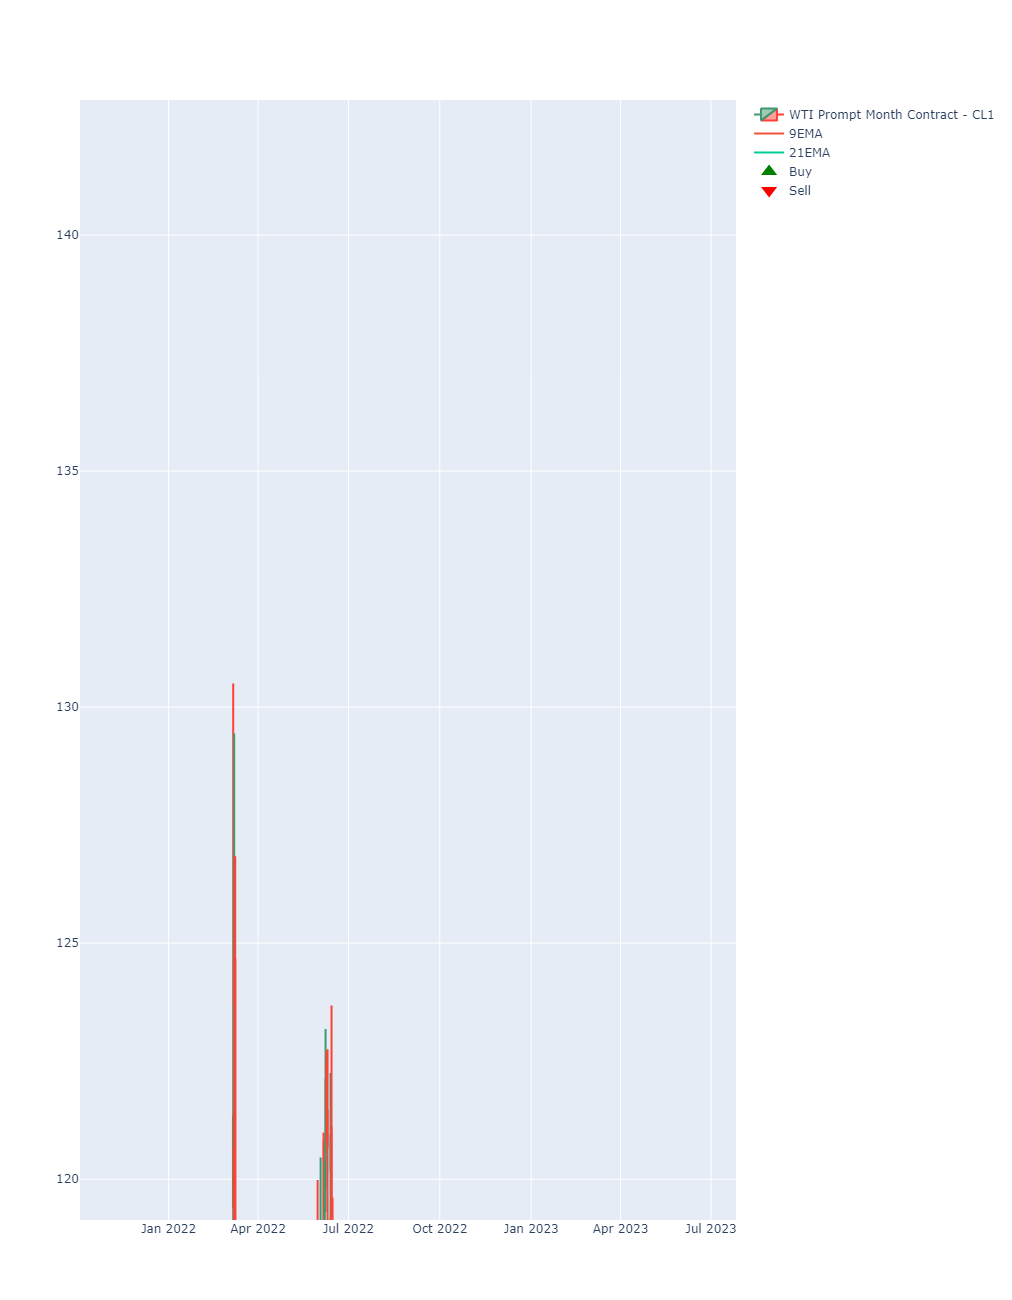

In [15]:
# simple candle chart

def ohlc_plot_sma(df):
    fig = go.Figure(data=[
                    go.Candlestick(
                        x=df.index,
                        open=df['Open'],
                        high=df['High'],
                        low=df['Low'], 
                        close=df['Close'],
                        name = 'WTI Prompt Month Contract - CL1'
                                        ),
                    go.Scatter(
                        x=df.index,
                        y=df['9EMA'],
                        name = '9EMA')]
                   )
                   
    fig.add_trace(go.Scatter(
                    x=df.index, 
                    y=df['21EMA'],
                    mode='lines',
                    name='21EMA')
                 
                 )
    # buy signals
    fig.add_trace(go.Scatter(
                    x=df[df['Position'] == 1].index, 
                    y=df['9EMA'][df['Position'] == 1],
                    mode='markers',
                    name='Buy',
                    marker_symbol='triangle-up',
                    marker_color='green',
                    marker_size=14))
    
    # sell signals
    fig.add_trace(go.Scatter(
                    x=df[df['Position'] == -1].index, 
                    y=df['21EMA'][df['Position'] == -1],
                    mode='markers',
                    name='Sell',
                    marker_symbol='triangle-down',
                    marker_color='red',
                    marker_size=14))
    
    fig.update_layout(xaxis_rangeslider_visible=False,width=2000, height=1300)
    fig.show()
ohlc_plot_sma(df=df)

       Dates  Close   Open   High    Low
0 2010-04-13  84.05  84.36  84.42  82.51
1 2010-04-14  85.84  83.82  86.39  83.71
2 2010-04-15  85.51  85.91  86.27  85.27
3 2010-04-16  83.24  85.31  85.44  82.52
4 2010-04-19  81.45  82.90  83.00  80.53


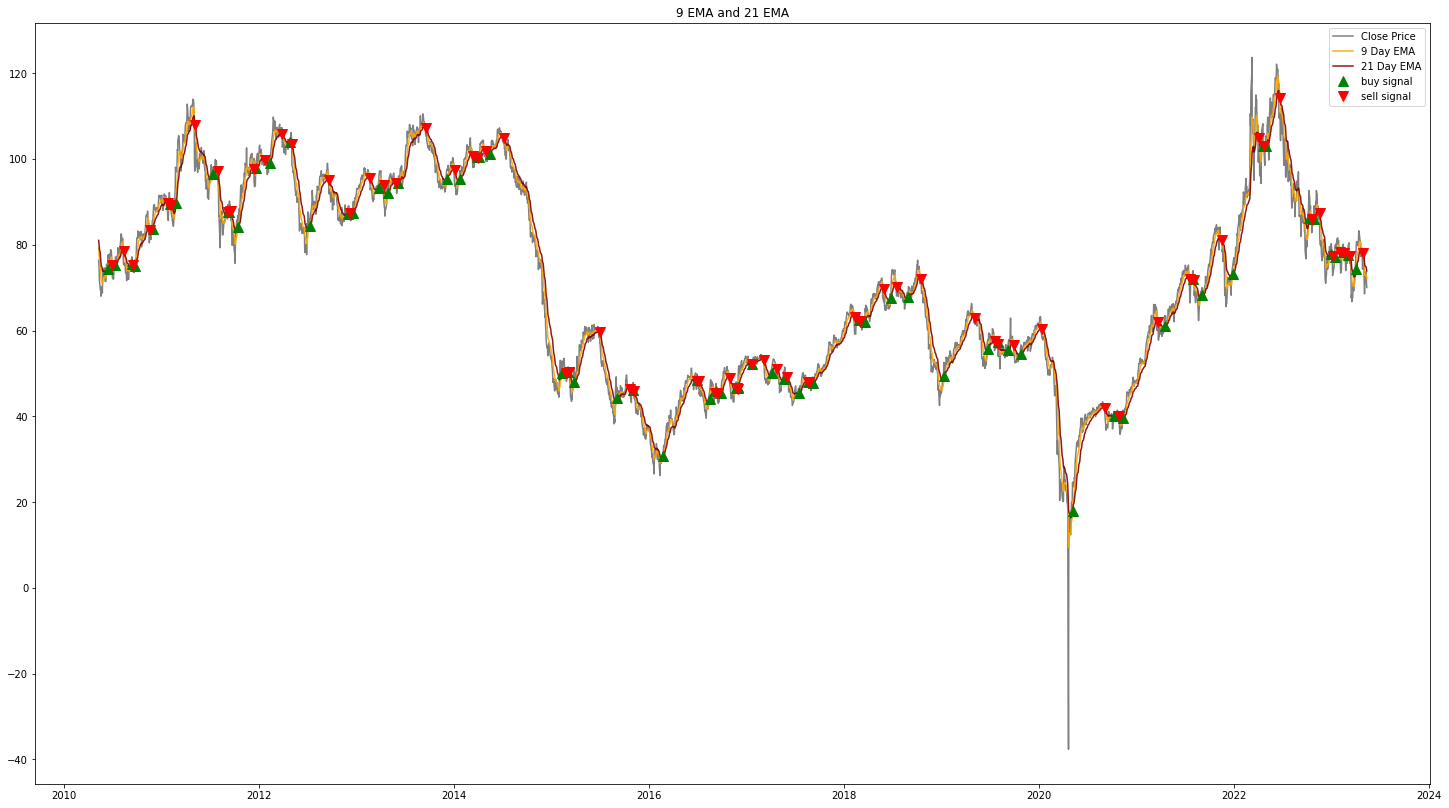

PermissionError: [Errno 13] Permission denied: 'trading-output-test.csv'

In [22]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Define the file path (change this to your actual file path)
file_path = r"C:\Users\Yousef Shahin\Downloads\bb_crude_data.xlsx"

# Load the data from the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())
# Define functions for SMA and EMA
def SMA(data, ndays): 
    data["{0}SMA".format(ndays)] = data['Close'].rolling(ndays).mean()
    return data

def EMA(data,ndays):
    data["{0}EMA".format(ndays)] = data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean()
    return data

# Core logic for generating buy and sell signals
'''
 signal: if 9EMA is greater than 21EMA, set signal to "1". if 9EMA is less than 21EMA, set signal to "0". This signal is 1 signal a day, determined by the closing price of crude oil, for both the 9 day exponential moving average and
 the 21 day exponential moving average. 
 
 position: position strictly acts on data in the "signal" column. position works by taking the current signal, and subtracting it from the previous signal. for example, if signal at current day is "0" and signal at current day - 1
 is "0", then no position is acted upon. If the signal at the current day is "1" and the previous day is "0", then enter a position. If the signal is 0 at the current day, and 1 at the previous day, exit your position.
'''
def core_logic(data=pd.DataFrame()): 
    data = data.set_index('Dates')
    data = data[data.index > '2010-05-10'] 
    data['Signal'] = np.where(data['9EMA'] > data['21EMA'], 1, 0)
    data['Position'] = data['Signal'].diff()
    return data

# Create EMA columns
data = EMA(data, 9)
data = EMA(data, 21)
# Create buy / sell signals
data = core_logic(data=data)

# Initialize the new columns
data['Cash Position'] = 0.0
data['Portfolio Value'] = 0.0
data['PnL'] = 0.0

cash_position = 25000.0
portfolio_value = 0.0
pnl = 0.0
buy_price = 0.0

for i, row in data.iterrows():
    if row['Position'] == 1:
        cash_position -= row['Close']
        portfolio_value = row['Close']
        buy_price = row['Close']  # store the buy price
    elif row['Position'] == -1:
        cash_position += row['Close']
        pnl += row['Close'] - buy_price  # calculate the PnL
        portfolio_value = 0.0
    else:
        if portfolio_value > 0:  # we have an open position
            portfolio_value = row['Close']  # update portfolio value at current day's closing price

    data.at[i, 'Cash Position'] = cash_position
    data.at[i, 'Portfolio Value'] = portfolio_value
    data.at[i, 'PnL'] = pnl

plt.figure(figsize=(25, 14))
plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.5)
plt.plot(data.index, data['9EMA'], label='9 Day EMA', color='orange', alpha=0.9)
plt.plot(data.index, data['21EMA'], label='21 Day EMA', color='maroon', alpha=0.9)
plt.plot(data[data['Position'] == 1].index, data['9EMA'][data['Position'] == 1], '^', markersize=10, color='green', label='buy signal')
plt.plot(data[data['Position'] == -1].index, data['21EMA'][data['Position'] == -1], 'v', markersize=10, color='red', label='sell signal')
plt.title('9 EMA and 21 EMA')
plt.legend()
plt.show()

data.to_csv('trading-output-test.csv')